In [ ]:
!pip install wordcloud

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

from wordcloud import WordCloud, STOPWORDS

import pandas as pd

from google.colab import drive
from google.colab import files
import io
import os

import re
import json
import requests

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
links_per_month = {
    'fev':[
        'https://agenciabrasil.ebc.com.br/saude/noticia/2020-02/ministerio-da-saude-confirma-primeiro-caso-de-coronavirus-no-brasil',
        'https://g1.globo.com/bemestar/coronavirus/noticia/2020/02/28/oms-eleva-risco-para-epidemia-de-coronavirus-no-mundo-para-muito-alto.ghtml',
        'https://noticias.uol.com.br/saude/ultimas-noticias/redacao/2020/02/29/ministerio-da-saude-confirma-segundo-caso-de-covid-19-no-brasil.htm'
    ],
    'mar':[
        'https://noticias.uol.com.br/saude/ultimas-noticias/redacao/2020/03/30/voluntarios-no-recife-montam-fabrica-de-jalecos-em-tnt-para-suprir-faltas.htm',
        'https://www.correiobraziliense.com.br/app/noticia/brasil/2020/03/08/interna-brasil,832970/minas-gerais-tem-primeiro-caso-confirmado-de-coronavirus.shtml',
        'https://g1.globo.com/politica/noticia/2020/03/24/travamento-do-pais-e-pessimo-para-a-saude-diz-mandetta.ghtml',
        'https://agenciabrasil.ebc.com.br/geral/noticia/2020-03/governo-fecha-fronteiras-terrestres-com-paises-sul-americanos'
    ],
    'abr':{
        'https://g1.globo.com/mt/mato-grosso/noticia/2020/04/03/morre-o-1o-paciente-com-diagnostico-de-coronavirus-em-mt-diz-secretaria-de-saude.ghtml',
        'https://agenciabrasil.ebc.com.br/saude/noticia/2020-04/estudantes-da-area-de-saude-poderao-ajudar-no-combate-ao-coronavirus',
        'https://noticias.uol.com.br/saude/ultimas-noticias/redacao/2020/04/15/trf-suspende-exigencia-de-cpf-regular-para-receber-beneficio-em-todo-pais.htm',
        'https://www.correiobraziliense.com.br/app/noticia/politica/2020/04/09/interna_politica,843497/em-meio-a-quarentena-bolsonaro-visita-padaria-na-asa-norte.shtml'
    },
    'mai':[
        'https://agenciabrasil.ebc.com.br/politica/noticia/2020-05/covid-19-decreto-inclui-construcao-civil-entre-atividades-essenciais',
        'https://g1.globo.com/mundo/noticia/2020/05/24/eua-anunciam-proibicao-de-entrada-de-viajantes-vindos-do-brasil-por-causa-de-coronavirus.ghtml',
        'https://www.correiobraziliense.com.br/app/noticia/politica/2020/05/09/interna_politica,853123/bolsonaristas-dancam-com-caixao-e-negam-10-mil-mortes-mata-muito-men.shtml',
        'https://noticias.uol.com.br/cotidiano/ultimas-noticias/2020/05/22/feriado-segunda-votacao-alesp-aprova.htm'
    ],
    'jun':[
        'https://www.correiobraziliense.com.br/app/noticia/eu-estudante/ensino_ensinosuperior/2020/06/17/interna-ensinosuperior-2019,864590/ministerio-da-educacao-autoriza-aulas-remotas-ate-o-fim-do-ano.shtml',
        'https://g1.globo.com/am/amazonas/noticia/2020/06/15/hospital-de-campanha-de-manaus-encerra-atividades-apos-dois-meses-e-prefeitura-fala-em-reducao-de-casos-de-covid-19.ghtml',
        'https://agenciabrasil.ebc.com.br/saude/noticia/2020-06/brasil-assume-primeiro-lugar-em-numero-de-recuperados-de-covid-19',
        'https://noticias.uol.com.br/saude/ultimas-noticias/redacao/2020/06/28/sao-paulo-registra-143-mil-obitos-e-2717-mil-casos-de-coronavirus.htm'
    ],
    'jul':[
        'https://g1.globo.com/rs/rio-grande-do-sul/noticia/2020/07/21/ministerio-da-saude-nao-renova-pesquisa-sobre-efeitos-da-covid-19-na-populacao-brasileira-diz-ufpel.ghtml',
        'https://agenciabrasil.ebc.com.br/politica/noticia/2020-07/bolsonaro-apresenta-boas-condicoes-de-saude-diz-planalto',
        'https://noticias.uol.com.br/saude/ultimas-noticias/redacao/2020/07/27/doria-diz-que-vacina-do-instituto-butatan-estara-disponivel-em-janeiro.htm',
        'https://www.correiobraziliense.com.br/app/noticia/brasil/2020/07/15/interna-brasil,872504/brasil-e-grande-exemplo-de-combate-a-covid-no-mundo-diz-secretario.shtml'
    ],
    'ago':[
        'https://www.correiobraziliense.com.br/app/noticia/brasil/2020/08/04/interna-brasil,878455/covid-brasil-ultrapassa-95-mil-mortes-e-se-aproxima-de-3-milhoes-de-c.shtml',
        'https://g1.globo.com/sp/sao-paulo/noticia/2020/08/12/joao-doria-afirma-que-testou-positivo-para-covid-19.ghtml',
        'https://agenciabrasil.ebc.com.br/justica/noticia/2020-08/justica-do-rio-confirma-proibicao-de-escolas-reabrirem',
        'https://noticias.uol.com.br/cotidiano/ultimas-noticias/2020/08/19/pandemia-provoca-aumento-de-trabalho-infantil-em-sao-paulo-diz-mpt.htm'
    ],
    'set':[
        'https://g1.globo.com/bemestar/coronavirus/noticia/2020/09/26/casos-e-mortes-por-coronavirus-no-brasil-em-26-de-setembro-segundo-consorcio-de-veiculos-de-imprensa.ghtml',
        'https://noticias.uol.com.br/saude/ultimas-noticias/redacao/2020/09/14/doria-confia-em-acordo-para-vacina-no-sus-que-pode-sair-ate-quarta-feira.htm',
        'https://www.correiobraziliense.com.br/cidades-df/2020/09/4878218-sustento-sobrevivencia-e-saude-comprometidos.html',
        'https://agenciabrasil.ebc.com.br/saude/noticia/2020-09/taxa-de-eficiencia-da-coronavac-em-idosos-e-de-98-diz-doria'
    ],
    'out':[
        'https://g1.globo.com/bemestar/coronavirus/noticia/2020/10/15/casos-e-mortes-por-coronavirus-no-brasil-em-15-de-outubro-segundo-consorcio-de-veiculos-de-imprensa.ghtml',
        'https://noticias.uol.com.br/saude/ultimas-noticias/redacao/2020/10/29/covid-19-coronavirus-mortes-casos-29-de-outubro.htm',
        'https://agenciabrasil.ebc.com.br/saude/noticia/2020-10/infogripe-mostra-tendencia-de-aumento-da-covid-19-em-algumas-capitais',
        'https://www.correiobraziliense.com.br/brasil/2020/10/4884606-brasil-acumula-53-milhoes-de-casos-e-157-mil-mortes-por-covid-19.html'
    ],
    'nov':[
        'https://www.correiobraziliense.com.br/brasil/2020/11/4888466-brasil-registra-mais-908-obitos-e-ultrapassa-marca-de-164-mil-mortes.html',
        'https://noticias.uol.com.br/ultimas-noticias/rfi/2020/11/30/oms-alerta-para-situacao-muito-preocupante-da-covid-19-no-brasil.htm',
        'https://g1.globo.com/bemestar/coronavirus/noticia/2020/11/30/casos-e-mortes-por-coronavirus-no-brasil-em-30-de-novembro-segundo-consorcio-de-veiculos-de-imprensa.ghtml',
        'https://agenciabrasil.ebc.com.br/politica/noticia/2020-11/bolsonaro-brasil-vai-comprar-qualquer-vacina-certificada-pela-anvisa'
    ],
    'dez':[
        'https://www.correiobraziliense.com.br/brasil/2020/12/4895395-ministerio-comprara-46-milhoes-de-doses-da-coronavac-diz-helder-barbalho.html',
        'https://g1.globo.com/rj/rio-de-janeiro/noticia/2020/12/04/governo-e-prefeitura-do-rio-anunciam-novas-medidas-contra-a-covid-19.ghtml',
        'https://noticias.uol.com.br/saude/ultimas-noticias/redacao/2020/12/29/saude-preve-vacinacao-contra-covid-entre-20-de-janeiro-e-10-de-fevereiro.htm',
        'https://agenciabrasil.ebc.com.br/internacional/noticia/2020-12/brasil-passa-exigir-teste-negativo-de-covid-19-para-entrada-no-pais'
    ]
}

domains_final = ['//g1.globo.com/', '//noticias.uol.com.br/', '//agenciabrasil.ebc.com.br/', '//www.correiobraziliense.com.br/']

In [ ]:
months = ['fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']
dfs = []
for month in months:
  if month == 'fev':
    for i in range(1, 4):
      dfs.append(pd.read_csv(f'drive/My Drive/Analise de Rede Social/csvs/{month}_{i}.csv'))
  else:
    for i in range(1, 5):
      dfs.append(pd.read_csv(f'drive/My Drive/Analise de Rede Social/csvs/{month}_{i}.csv'))

In [ ]:
dfs[1].columns

Index(['Page Name', 'User Name', 'Facebook Id', 'Page Category',
       'Page Admin Top Country', 'Page Description', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created',
       'Post Created Date', 'Post Created Time', 'Type', 'Total Interactions',
       'Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry',
       'Care', 'Video Share Status', 'Is Video Owner?', 'Post Views',
       'Total Views', 'Total Views For All Crossposts', 'Video Length', 'URL',
       'Message', 'Link', 'Final Link', 'Image Text', 'Link Text',
       'Description', 'Sponsor Id', 'Sponsor Name', 'Sponsor Category',
       'Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )'],
      dtype='object')

In [ ]:
dfs[1]['Link Text']

0    OMS eleva risco para epidemia de coronavírus n...
1    OMS eleva risco para epidemia de coronavírus n...
2    OMS eleva risco da epidemia de coronavírus no ...
3    OMS eleva risco da epidemia de coronavírus no ...
4    OMS eleva risco para epidemia de coronavírus n...
Name: Link Text, dtype: object

In [ ]:
def getDescription(link):
    try:
        desc = link[(re.search(".*\/", link)).span()[1]:]
        desc = desc[:desc.index('.')]
    except AttributeError:
        return None
    finally:
        return desc

In [ ]:
links = []
for month in links_per_month:
  links.extend(links_per_month[month])
print(links)

['https://agenciabrasil.ebc.com.br/saude/noticia/2020-02/ministerio-da-saude-confirma-primeiro-caso-de-coronavirus-no-brasil', 'https://g1.globo.com/bemestar/coronavirus/noticia/2020/02/28/oms-eleva-risco-para-epidemia-de-coronavirus-no-mundo-para-muito-alto.ghtml', 'https://noticias.uol.com.br/saude/ultimas-noticias/redacao/2020/02/29/ministerio-da-saude-confirma-segundo-caso-de-covid-19-no-brasil.htm', 'https://noticias.uol.com.br/saude/ultimas-noticias/redacao/2020/03/30/voluntarios-no-recife-montam-fabrica-de-jalecos-em-tnt-para-suprir-faltas.htm', 'https://www.correiobraziliense.com.br/app/noticia/brasil/2020/03/08/interna-brasil,832970/minas-gerais-tem-primeiro-caso-confirmado-de-coronavirus.shtml', 'https://g1.globo.com/politica/noticia/2020/03/24/travamento-do-pais-e-pessimo-para-a-saude-diz-mandetta.ghtml', 'https://agenciabrasil.ebc.com.br/geral/noticia/2020-03/governo-fecha-fronteiras-terrestres-com-paises-sul-americanos', 'https://g1.globo.com/mt/mato-grosso/noticia/2020/04

In [ ]:
dfs2 = []
for df in dfs:
  dfs2.append(df.copy(deep=True))



drop_columns = ['Page Admin Top Country','User Name', 'Page Description', 'Page Created', 'Type', 'Video Share Status', 'Is Video Owner?', 'Video Length', 'Image Text', 'Sponsor Id', 'Sponsor Name', 'Sponsor Category']
for i in range(len(dfs2)):
  for col in drop_columns:
    try:
      dfs2[i] = dfs2[i].drop([col], axis=1)
    except KeyError:
      continue
  dfs2[i]['Link Text'].fillna(getDescription(links[i]), inplace=True)
  dfs2[i]['Link Text'].replace('This is a re-share of a post 	', getDescription(links[i]))

In [ ]:
total_interactions = []
for dataframe in dfs2:
  current_interaction = 0
  for i, v in enumerate(dataframe['Total Interactions']):
    dataframe['Total Interactions'][i] = int(str(v).replace(',',''))
    current_interaction += int(str(v).replace(',',''))

dfs_dropna = []
for df in dfs2:
  dfs_dropna.append(df.copy(deep=True))

for df in dfs_dropna:
  # Verificar se 'Likes at Posting' é NaN
  mask_likes_nan = df['Likes at Posting'].isna()

  # Verificar se 'Followers at Posting' é NaN
  mask_followers_nan = df['Followers at Posting'].isna()

  # Descartar as linhas onde tanto 'Likes at Posting' quanto 'Followers at Posting' são NaN
  df.dropna(subset=['Likes at Posting', 'Followers at Posting'], how='all', inplace=True)

  # Atualizar 'Likes at Posting' com 'Followers at Posting' onde 'Likes at Posting' é NaN
  df.loc[mask_likes_nan, 'Likes at Posting'] = df.loc[mask_likes_nan, 'Followers at Posting']

  # Atualizar 'Followers at Posting' com 'Likes at Posting' onde 'Followers at Posting' é NaN
  df.loc[mask_followers_nan, 'Followers at Posting'] = df.loc[mask_followers_nan, 'Likes at Posting']


avg_engagement_rate_followers_per_df = []
avg_engagement_rate_likes_per_df = []
avg_engagement_rate_both_per_df = []

max_engagement_rate_both_per_df = []
max_total_interactions_per_df = []

total_interactions_per_df = []
avg_interactions_per_df = []

reach_per_df = []


for df in dfs_dropna:
  total_interactions_per_df.append(sum(df['Total Interactions']))
  avg_interactions_per_df.append(df['Total Interactions'].mean())
  reach_per_df.append(sum(df['Shares']))

  df['Engagement Rate (Followers)'] = (df['Total Interactions'] / df['Followers at Posting']) * 100
  avg_engagement_rate_followers_per_df.append(df['Engagement Rate (Followers)'].mean())

  df['Engagement Rate (Likes)'] = (df['Total Interactions'] / df['Likes at Posting']) * 100
  avg_engagement_rate_likes_per_df.append(df['Engagement Rate (Likes)'].mean())

  df['Engagement Rate (Average)'] = df['Total Interactions'] / ((df['Likes at Posting'] + df['Followers at Posting'])/2) * 100
  avg_engagement_rate_both_per_df.append(df['Engagement Rate (Average)'].mean())

  max_engagement_rate_both_per_df.append(max(df['Engagement Rate (Average)']))
  max_total_interactions_per_df.append(max(df['Total Interactions']))


total_interactions_per_month = [sum(total_interactions_per_df[:3])]
for month in range(3, len(total_interactions_per_df[3:]), 4):
  total_interactions_per_month.append(sum(total_interactions_per_df[month:month+4]))

avg_interactions_per_month = [sum(avg_interactions_per_df[:3])/3]
for month in range(3, len(avg_interactions_per_df[3:]), 4):
  avg_interactions_per_month.append(sum(avg_interactions_per_df[month:month+4])/4)

avg_engagement_rate_followers = [sum(avg_engagement_rate_followers_per_df[:3])]
for month in range(3, len(avg_engagement_rate_followers_per_df[3:]), 4):
  avg_engagement_rate_followers.append(sum(avg_engagement_rate_followers_per_df[month:month+4])/4)

avg_engagement_rate_likes = [sum(avg_engagement_rate_likes_per_df[:3])]
for month in range(3, len(avg_engagement_rate_likes_per_df[3:]), 4):
  avg_engagement_rate_likes.append(sum(avg_engagement_rate_likes_per_df[month:month+4])/4)

avg_engagement_rate_both = [sum(avg_engagement_rate_both_per_df[:3])]
for month in range(3, len(avg_engagement_rate_both_per_df[3:]), 4):
  avg_engagement_rate_both.append(sum(avg_engagement_rate_both_per_df[month:month+4])/4)

#print(avg_interactions_per_df)
#print(avg_interactions_per_month)
#print(total_interactions_per_df)
#print(total_interactions_per_month)
print(max_engagement_rate_both_per_df)
print(max_total_interactions_per_df)

<ipython-input-11-63ff3c5ccec9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Total Interactions'][i] = int(str(v).replace(',',''))
<ipython-input-11-63ff3c5ccec9>:26: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[mask_followers_nan, 'Followers at Posting'] = df.loc[mask_followers_nan, 'Likes at Posting']
<ipython-input-11-63ff3c5ccec9>:26: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if c

[0.22645293822687348, 0.04580472689657805, 0.4779788323659952, 2.3071224468197693, 0.005756780150622041, 1.9952288006939927, 1.9543973941368076, 0.06199628022318661, 0.4002287021154946, 0.9250337251878975, 2.070393374741201, 0.028153945775500434, 5.776534079552269, 4.80225988700565, 2.5593414781261457, 0.13238749079335724, 2.7716716047022842, 20.59953881629516, 0.007973449271286752, 3.28976354824497, 2.5576730190571713, 1.455537866727314, 5.337519623233909, 0.0679073855992055, 15.869181454984671, 0.5595359945411122, 0.33237680381510765, 0.8285004142502072, 0.03174464937679047, 0.2746294681778553, 0.1333926189417519, 0.027259654536301164, 0.2613240418118467, 0.0, 0.009192158007789003, 0.11952087717930729, 0.5555698449034183, 0.7159904534606205, 3.2911392405063293, 0.014588000424132604, 1.9673509844263894, 0.39205990392766316, 0.16886187098953057]
[70, 4967, 7546, 109, 42, 894, 102, 5, 373, 904, 5132, 5, 27568, 11200, 2164, 985, 45126, 12688, 651, 7681, 4839, 24319, 4272, 506, 42248, 41,

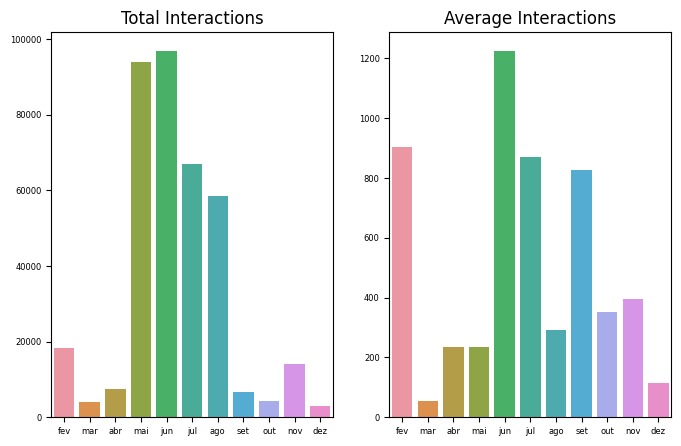

In [ ]:
fig, ax = plt.subplots(1,2)
sns.barplot(x=months, y=total_interactions_per_month, ax=ax[0])
sns.barplot(x=months, y=avg_interactions_per_month, ax=ax[1])

fig.set_figheight(5)
fig.set_figwidth(8)
for a in ax:
  a.tick_params(axis='x', labelsize=6)
  a.tick_params(axis='y', labelsize=6)
ax[0].title.set_text('Total Interactions')
ax[1].title.set_text('Average Interactions')
fig.show()

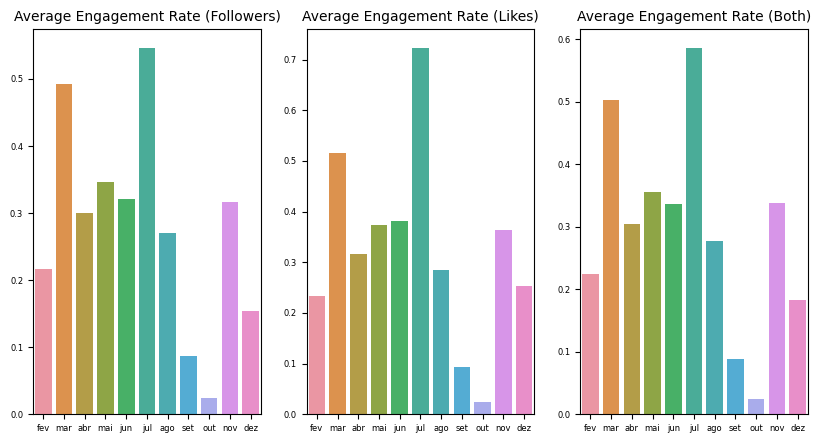

In [ ]:

fig, ax = plt.subplots(1,3)
sns.barplot(x=months, y=avg_engagement_rate_followers, ax=ax[0])
sns.barplot(x=months, y=avg_engagement_rate_likes, ax=ax[1])
sns.barplot(x=months, y=avg_engagement_rate_both, ax=ax[2])

fig.set_figheight(5)
fig.set_figwidth(10)
for a in ax:
  a.tick_params(axis='x', labelsize=6)
  a.tick_params(axis='y', labelsize=6)
ax[0].set_title('Average Engagement Rate (Followers)', fontsize=10)
ax[1].set_title('Average Engagement Rate (Likes)', fontsize=10)
ax[2].set_title('Average Engagement Rate (Both)', fontsize=10)
fig.show()

In [ ]:
domains_total_interactions = {'//g1.globo.com/':[], '//noticias.uol.com.br/':[], '//agenciabrasil.ebc.com.br/':[], '//www.correiobraziliense.com.br/':[]}
domains_avg_interactions = {'//g1.globo.com/':[], '//noticias.uol.com.br/':[], '//agenciabrasil.ebc.com.br/':[], '//www.correiobraziliense.com.br/':[]}
domains_avg_engagement_rate_both = {'//g1.globo.com/':[], '//noticias.uol.com.br/':[], '//agenciabrasil.ebc.com.br/':[], '//www.correiobraziliense.com.br/':[]}
domains_avg_engagement_rate_likes = {'//g1.globo.com/':[], '//noticias.uol.com.br/':[], '//agenciabrasil.ebc.com.br/':[], '//www.correiobraziliense.com.br/':[]}
domains_avg_engagement_rate_followers = {'//g1.globo.com/':[], '//noticias.uol.com.br/':[], '//agenciabrasil.ebc.com.br/':[], '//www.correiobraziliense.com.br/':[]}
reach = {'//g1.globo.com/':[], '//noticias.uol.com.br/':[], '//agenciabrasil.ebc.com.br/':[], '//www.correiobraziliense.com.br/':[]}
domain_max_engagement_rate = {'//g1.globo.com/':[], '//noticias.uol.com.br/':[], '//agenciabrasil.ebc.com.br/':[], '//www.correiobraziliense.com.br/':[]}
domain_max_total_interactions = {'//g1.globo.com/':[], '//noticias.uol.com.br/':[], '//agenciabrasil.ebc.com.br/':[], '//www.correiobraziliense.com.br/':[]}

def getDomain(link):
    try:
        domain = (re.search("//(.+?)/", link)).group()
    except AttributeError:
        return None
    return domain

i = 0
for month in links_per_month.keys():
  for link in links_per_month[month]:
    domain = getDomain(link)
    domains_total_interactions[domain].append(total_interactions_per_df[i])
    domains_avg_interactions[domain].append(avg_interactions_per_df[i])
    domains_avg_engagement_rate_both[domain].append(avg_engagement_rate_both_per_df[i])
    domains_avg_engagement_rate_likes[domain].append(avg_engagement_rate_likes_per_df[i])
    domains_avg_engagement_rate_followers[domain].append(avg_engagement_rate_followers_per_df[i])

    reach[domain].append(reach_per_df[i])

    domain_max_engagement_rate[domain].append(max_engagement_rate_both_per_df[i])
    domain_max_total_interactions[domain].append(max_total_interactions_per_df[i])

    i+= 1
  if(month == 'fev'):
    domains_total_interactions['//www.correiobraziliense.com.br/'].append(0)
    domains_avg_interactions['//www.correiobraziliense.com.br/'].append(0)
    domains_avg_engagement_rate_both['//www.correiobraziliense.com.br/'].append(0)
    domains_avg_engagement_rate_likes['//www.correiobraziliense.com.br/'].append(0)
    domains_avg_engagement_rate_followers['//www.correiobraziliense.com.br/'].append(0)
    reach['//www.correiobraziliense.com.br/'].append(0)
    domain_max_engagement_rate['//www.correiobraziliense.com.br/'].append(0)
    domain_max_total_interactions['//www.correiobraziliense.com.br/'].append(0)

#print(json.dumps(domains_total_interactions, indent=4))
print(domains_avg_engagement_rate_likes)

{'//g1.globo.com/': [0.026068087860005723, 0.38712381680935287, 0.06199628022318661, 0.4253025283996617, 0.3853147568864386, 0.3225021392191161, 0.44387405539735586, 0.18635169372302396, 0.017441873770471693, 0.11505661408187391, 0.8574651003665437], '//noticias.uol.com.br/': [0.11582011267030065, 0.9062040418365767, 0.11660314865213148, 0.4553230389365247, 0.008099301668505908, 0.3408950744954036, 0.10574495483041076, 0.03232541248313002, 0.07044405957858983, 0.1348132012084851, 0.06960123409223645], '//agenciabrasil.ebc.com.br/': [0.0914184495482359, 0.7669196930226186, 0.15230896459411972, 0.014557672820427428, 0.999930035067023, 1.28986526497592, 0.5658294231300027, 0.07363233138683761, 0.0, 1.170522136528027, 0.06694117233810028], '//www.correiobraziliense.com.br/': [0, 0.005755206406366903, 0.9326060276988846, 0.5949417208250196, 0.133890098657293, 0.9410273083552946, 0.022908885116015843, 0.07750865768970468, 0.009219588914800151, 0.03499786694986555, 0.01463940303767613]}


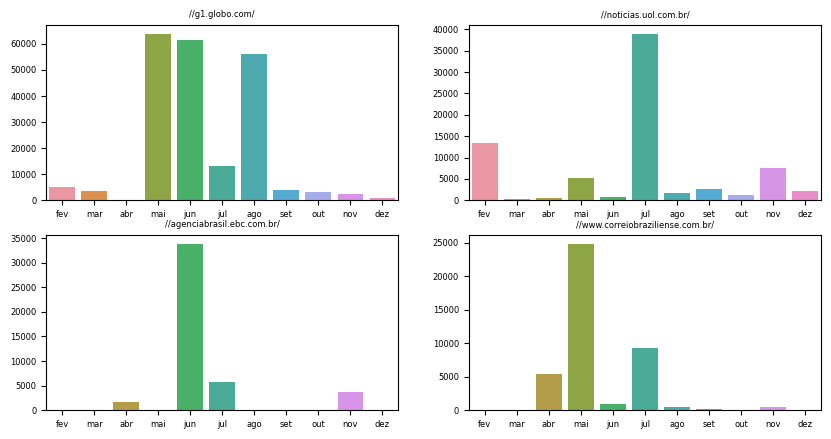

In [ ]:
fig, ax = plt.subplots(2,2)
for i, domain in enumerate(domains_total_interactions):
  sns.barplot(x=months, y=domains_total_interactions[domain], ax=ax[int(math.floor(i/2))][math.floor(i%2)])

fig.set_figheight(5)
fig.set_figwidth(10)
for i, a in enumerate(ax):
  for j, a_ in enumerate(a):
    a_.tick_params(axis='x', labelsize=6)
    a_.tick_params(axis='y', labelsize=6)
    a_.set_title(f'{list(domains_total_interactions.keys())[2*i+j]}', fontsize=6)
fig.show()

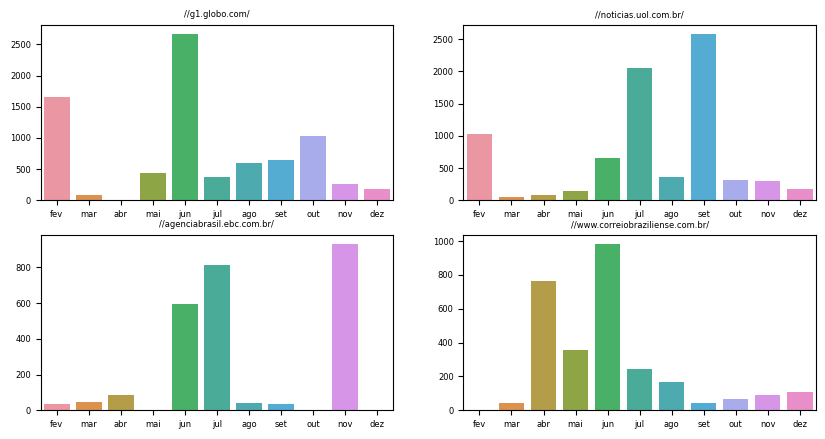

In [ ]:
fig, ax = plt.subplots(2,2)
for i, domain in enumerate(domains_avg_interactions):
  sns.barplot(x=months, y=domains_avg_interactions[domain], ax=ax[int(math.floor(i/2))][math.floor(i%2)])

fig.set_figheight(5)
fig.set_figwidth(10)
for i, a in enumerate(ax):
  for j, a_ in enumerate(a):
    a_.tick_params(axis='x', labelsize=6)
    a_.tick_params(axis='y', labelsize=6)
    a_.set_title(f'{list(domains_avg_interactions.keys())[2*i+j]}', fontsize=6)
fig.show()

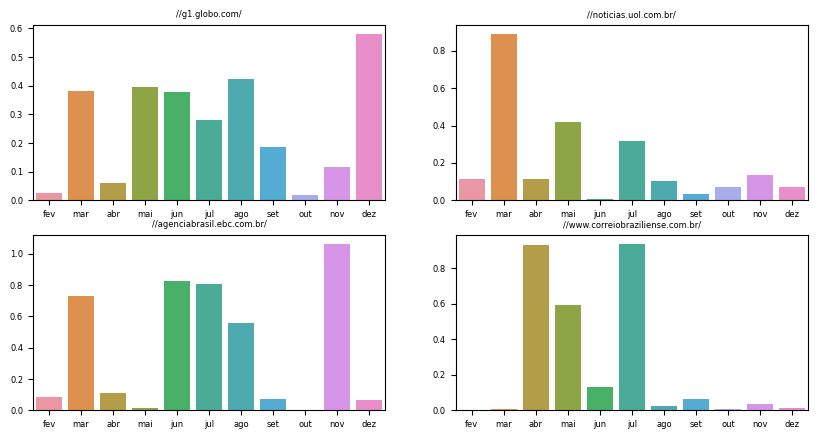

In [ ]:
fig, ax = plt.subplots(2,2)
for i, domain in enumerate(domains_avg_engagement_rate_both):
  sns.barplot(x=months, y=domains_avg_engagement_rate_both[domain], ax=ax[int(math.floor(i/2))][math.floor(i%2)])

fig.set_figheight(5)
fig.set_figwidth(10)
for i, a in enumerate(ax):
  for j, a_ in enumerate(a):
    a_.tick_params(axis='x', labelsize=6)
    a_.tick_params(axis='y', labelsize=6)
    a_.set_title(f'{list(domains_avg_engagement_rate_both.keys())[2*i+j]}', fontsize=6)
fig.show()

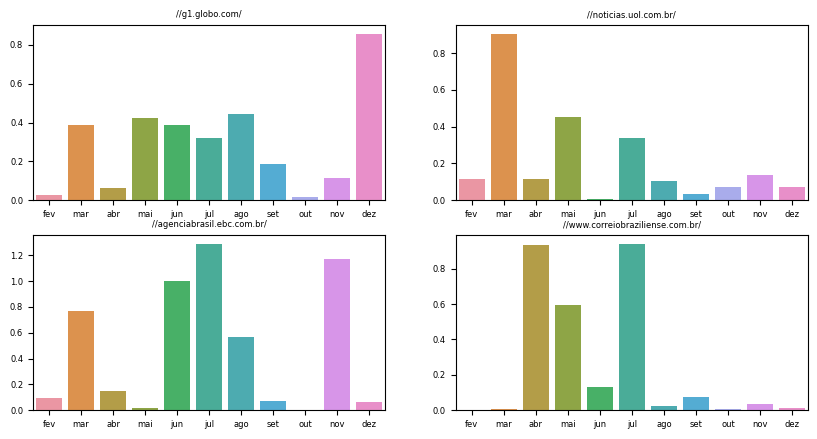

In [ ]:
fig, ax = plt.subplots(2,2)
for i, domain in enumerate(domains_avg_engagement_rate_likes):
  sns.barplot(x=months, y=domains_avg_engagement_rate_likes[domain], ax=ax[int(math.floor(i/2))][math.floor(i%2)])

fig.set_figheight(5)
fig.set_figwidth(10)
for i, a in enumerate(ax):
  for j, a_ in enumerate(a):
    a_.tick_params(axis='x', labelsize=6)
    a_.tick_params(axis='y', labelsize=6)
    a_.set_title(f'{list(domains_avg_engagement_rate_likes.keys())[2*i+j]}', fontsize=6)
fig.show()

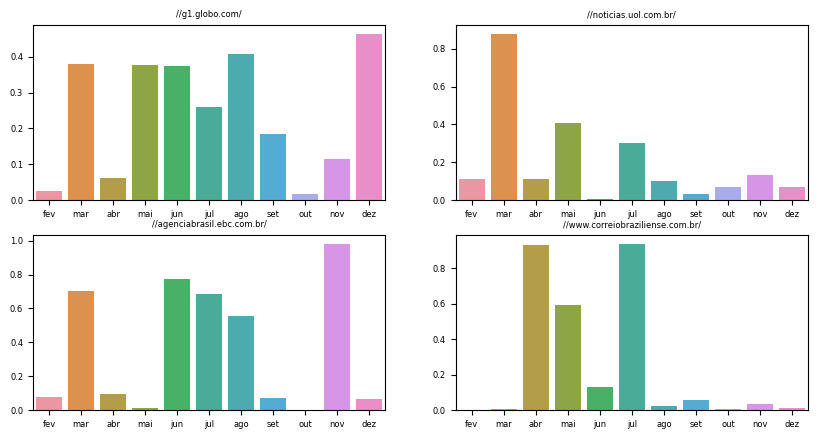

In [ ]:
fig, ax = plt.subplots(2,2)
for i, domain in enumerate(domains_avg_engagement_rate_followers):
  sns.barplot(x=months, y=domains_avg_engagement_rate_followers[domain], ax=ax[int(math.floor(i/2))][math.floor(i%2)])

fig.set_figheight(5)
fig.set_figwidth(10)
for i, a in enumerate(ax):
  for j, a_ in enumerate(a):
    a_.tick_params(axis='x', labelsize=6)
    a_.tick_params(axis='y', labelsize=6)
    a_.set_title(f'{list(domains_avg_engagement_rate_followers.keys())[2*i+j]}', fontsize=6)
fig.show()

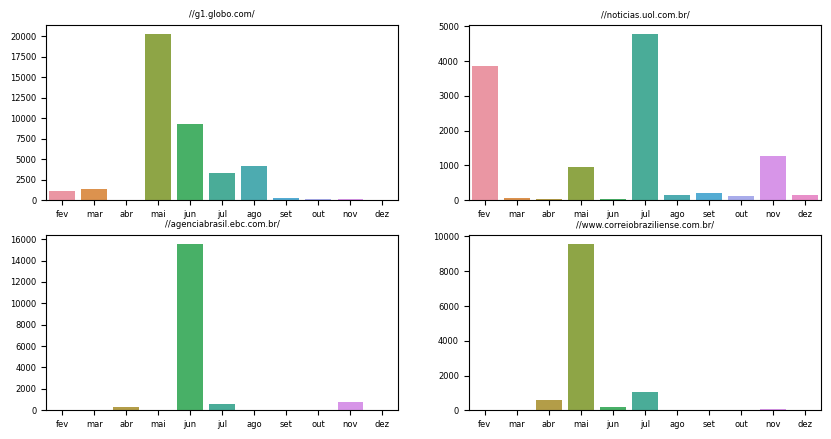

In [ ]:
fig, ax = plt.subplots(2,2)
for i, domain in enumerate(reach):
  sns.barplot(x=months, y=reach[domain], ax=ax[int(math.floor(i/2))][math.floor(i%2)])

fig.set_figheight(5)
fig.set_figwidth(10)
for i, a in enumerate(ax):
  for j, a_ in enumerate(a):
    a_.tick_params(axis='x', labelsize=6)
    a_.tick_params(axis='y', labelsize=6)
    a_.set_title(f'{list(domains_avg_engagement_rate_followers.keys())[2*i+j]}', fontsize=6)
fig.show()

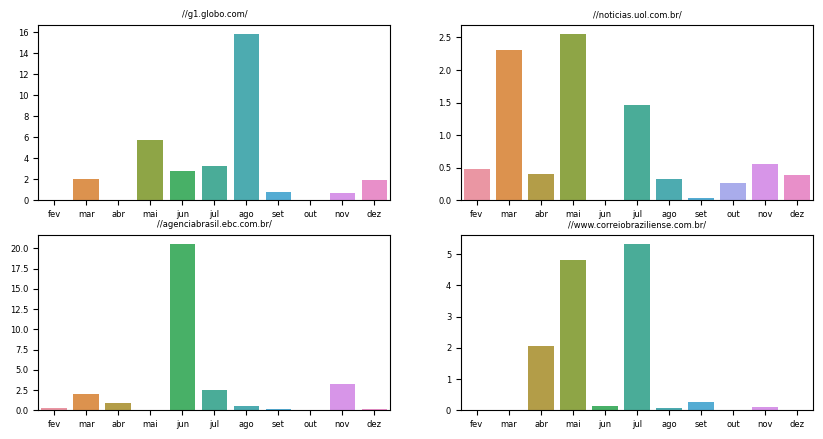

In [ ]:
fig, ax = plt.subplots(2,2)
for i, domain in enumerate(domain_max_engagement_rate):
  sns.barplot(x=months, y=domain_max_engagement_rate[domain], ax=ax[int(math.floor(i/2))][math.floor(i%2)])

fig.set_figheight(5)
fig.set_figwidth(10)
for i, a in enumerate(ax):
  for j, a_ in enumerate(a):
    a_.tick_params(axis='x', labelsize=6)
    a_.tick_params(axis='y', labelsize=6)
    a_.set_title(f'{list(domain_max_engagement_rate.keys())[2*i+j]}', fontsize=6)
fig.show()

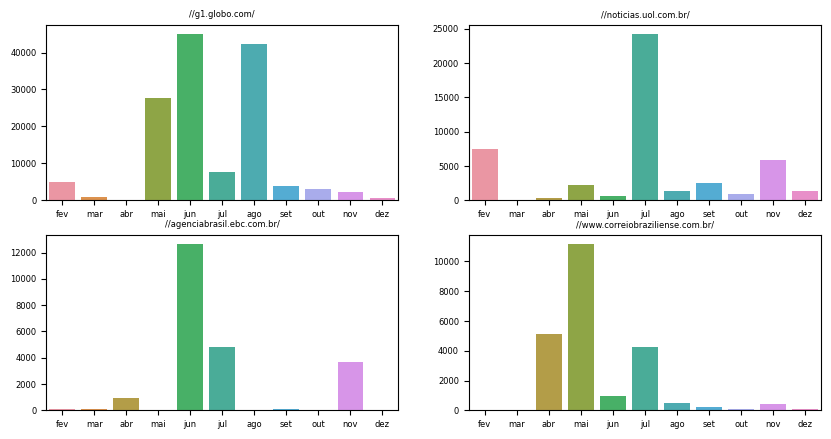

In [ ]:
fig, ax = plt.subplots(2,2)
for i, domain in enumerate(domain_max_total_interactions):
  sns.barplot(x=months, y=domain_max_total_interactions[domain], ax=ax[int(math.floor(i/2))][math.floor(i%2)])

fig.set_figheight(5)
fig.set_figwidth(10)
for i, a in enumerate(ax):
  for j, a_ in enumerate(a):
    a_.tick_params(axis='x', labelsize=6)
    a_.tick_params(axis='y', labelsize=6)
    a_.set_title(f'{list(domain_max_total_interactions.keys())[2*i+j]}', fontsize=6)
fig.show()

In [ ]:
# Coletar os títulos e descrições das notícias (exemplo)
title = []
description = []
for df in dfs_dropna:
  unique_title = df['Link Text'].drop_duplicates().tolist()
  unique_description = df['Description'].drop_duplicates().tolist()
  description.extend(unique_description)
  title.extend(unique_title)

corpus_title = list(set(title))
corpus_description = list(set(description))

rmv = 'This is a re-share of a post'
corpus_title = ' '.join([str(t) for t in title if str(t) != 'nan' and str(t) != rmv])
corpus_description = ' '.join([str(t) for t in description if str(t) != 'nan'])

# Pré-processamento: remover pontuações e caracteres especiais e converter para minúsculas
corpus_title = ''.join([c for c in corpus_title if c.isalpha() or c.isspace()])
corpus_title = corpus_title.lower()
corpus_description = ''.join([c for c in corpus_description if c.isalpha() or c.isspace()])
corpus_description = corpus_description.lower()

# Dividir o texto em palavras individuais ou tokens
tokens_title = nltk.word_tokenize(corpus_title)
tokens_description = nltk.word_tokenize(corpus_description)

# Remover stopwords (palavras irrelevantes)
stopwords_pt = set(stopwords.words('portuguese'))
tokens_title = [token for token in tokens_title if token not in stopwords_pt]
tokens_description = [token for token in tokens_description if token not in stopwords_pt]

# Calcular a frequência de cada palavra
f_title = Counter(tokens_title)
f_description = Counter(tokens_description)

# Ordenar as palavras pela frequência em ordem decrescente
common_words_title = f_title.most_common(10)
common_words_description = f_description.most_common(10)

print(common_words_title)
print(common_words_description)

[('covid', 23), ('brasil', 20), ('coronavírus', 13), ('diz', 10), ('mil', 10), ('mortes', 10), ('casos', 10), ('saúde', 9), ('doria', 6), ('ministério', 5)]
[('brasil', 66), ('covid', 51), ('saúde', 38), ('pessoas', 34), ('segundo', 32), ('coronavírus', 30), ('presidente', 30), ('casos', 29), ('estados', 27), ('país', 26)]


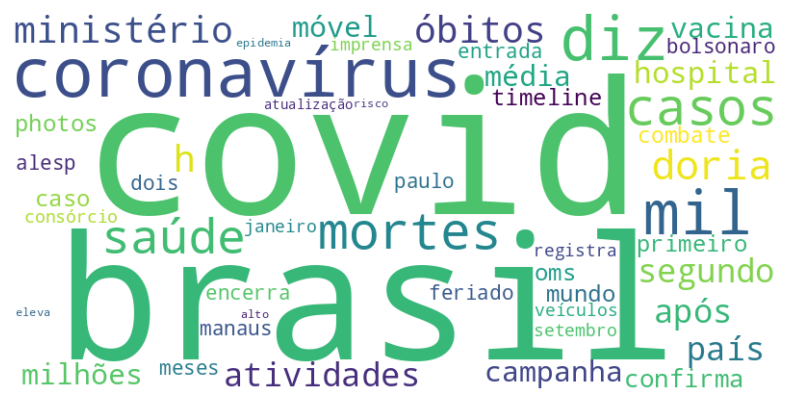

In [ ]:
_# Juntar novamente em uma única string
texto_limpo = ' '.join(tokens_title)

# Criar um objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50, prefer_horizontal=True, colormap='viridis')
wordcloud.generate_from_frequencies(f_title)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

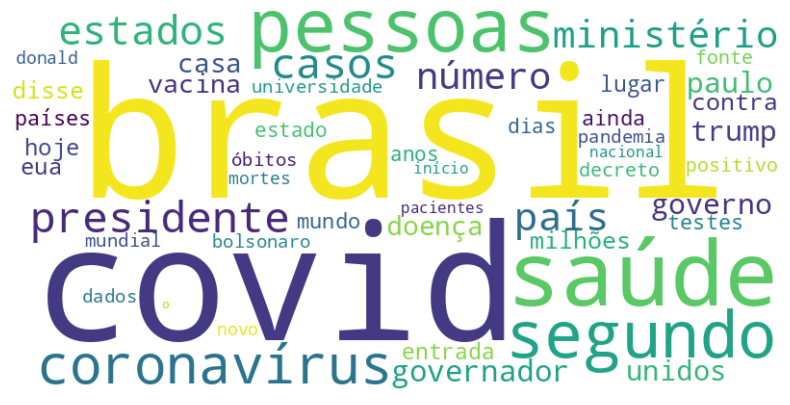

In [ ]:
_# Juntar novamente em uma única string
texto_limpo = ' '.join(tokens_description)

# Criar um objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50, prefer_horizontal=True, colormap='viridis')
wordcloud.generate_from_frequencies(f_description)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
domains_sequence = []
for month in links_per_month.keys():
  for link in links_per_month[month]:
    domains_sequence.append(getDomain(link))

dfs_domains_engagement = {'//g1.globo.com/':pd.DataFrame({'Page Name':[], 'Link Text':[], 'Engagement Rate (Average)':[]}), '//noticias.uol.com.br/':pd.DataFrame({'Page Name':[], 'Link Text':[], 'Engagement Rate (Average)':[]}), '//agenciabrasil.ebc.com.br/':pd.DataFrame({'Page Name':[], 'Link Text':[], 'Engagement Rate (Average)':[]}), '//www.correiobraziliense.com.br/':pd.DataFrame({'Page Name':[], 'Link Text':[], 'Engagement Rate (Average)':[]})}

for i, df in enumerate(dfs_dropna):
    if 'Page Name' in df.columns:
        dfs_domains_engagement[domains_sequence[i]] = pd.concat([dfs_domains_engagement[domains_sequence[i]], df[['Page Name', 'Link Text', 'Engagement Rate (Average)']].sort_values('Engagement Rate (Average)', ascending=False).iloc[[0]]], ignore_index=True)
    else:
        dfs_domains_engagement[domains_sequence[i]] = pd.concat([dfs_domains_engagement[domains_sequence[i]], df[['Group Name', 'Link Text', 'Engagement Rate (Average)']].sort_values('Engagement Rate (Average)', ascending=False).iloc[[0]]], ignore_index=True)

dfs_domains_engagement['//www.correiobraziliense.com.br/'] = pd.concat([pd.DataFrame({'Page Name':['None'], 'Link Text':'None', 'Total Interactions':0}), dfs_domains_engagement['//www.correiobraziliense.com.br/']], axis=0)

for domain in dfs_domains_engagement:
  dfs_domains_engagement[domain]['Month'] = months

dfs_domains_engagement['//agenciabrasil.ebc.com.br/']['Link Text'][5] = getDescription(links_per_month['jul'][1])

In [ ]:
domains_sequence = []
for month in links_per_month.keys():
  for link in links_per_month[month]:
    domains_sequence.append(getDomain(link))

dfs_domains = {'//g1.globo.com/':pd.DataFrame({'Page Name':[], 'Link Text':[], 'Total Interactions':[]}), '//noticias.uol.com.br/':pd.DataFrame({'Page Name':[], 'Link Text':[], 'Total Interactions':[]}), '//agenciabrasil.ebc.com.br/':pd.DataFrame({'Page Name':[], 'Link Text':[], 'Total Interactions':[]}), '//www.correiobraziliense.com.br/':pd.DataFrame({'Page Name':[], 'Link Text':[], 'Total Interactions':[]})}

for i, df in enumerate(dfs_dropna):
    if 'Page Name' in df.columns:
        dfs_domains[domains_sequence[i]] = pd.concat([dfs_domains[domains_sequence[i]], df[['Page Name', 'Link Text', 'Total Interactions']].sort_values('Total Interactions', ascending=False).iloc[[0]]], ignore_index=True)
    else:
        dfs_domains[domains_sequence[i]] = pd.concat([dfs_domains[domains_sequence[i]], df[['Group Name', 'Link Text', 'Total Interactions']].sort_values('Total Interactions', ascending=False).iloc[[0]]], ignore_index=True)

dfs_domains['//www.correiobraziliense.com.br/'] = pd.concat([pd.DataFrame({'Page Name':['None'], 'Link Text':'None', 'Total Interactions':0}), dfs_domains['//www.correiobraziliense.com.br/']], axis=0)

for domain in dfs_domains:
  dfs_domains[domain]['Month'] = months

dfs_domains['//www.correiobraziliense.com.br/']

,Page Name,Link Text,Total Interactions,Month
0,None,None,0,fev
0,Correio Braziliense,Minas Gerais tem primeiro caso confirmado de c...,42.0,mar
1,Correio Braziliense,"Em meio a quarentena, Bolsonaro visita padaria...",5132,abr
2,Correio Braziliense,Bolsonaristas dançam com caixão e negam 10 mil...,11200,mai
3,Correio Braziliense,Ministério da Educação autoriza aulas remotas ...,985,jun
4,Correio Braziliense,'Brasil é grande exemplo de combate à covid no...,4272,jul
5,Correio Braziliense,Covid: Brasil ultrapassa 95 mil mortes e se ap...,506,ago
6,Correio Braziliense,"Covid-19 compromete sustento, sobrevivência e ...",187,set
7,Correio Braziliense,"Brasil acumula 5,3 milhões de casos e 157 mil ...",68,out
8,Correio Braziliense,Brasil registra mais 908 óbitos e ultrapassa m...,409,nov


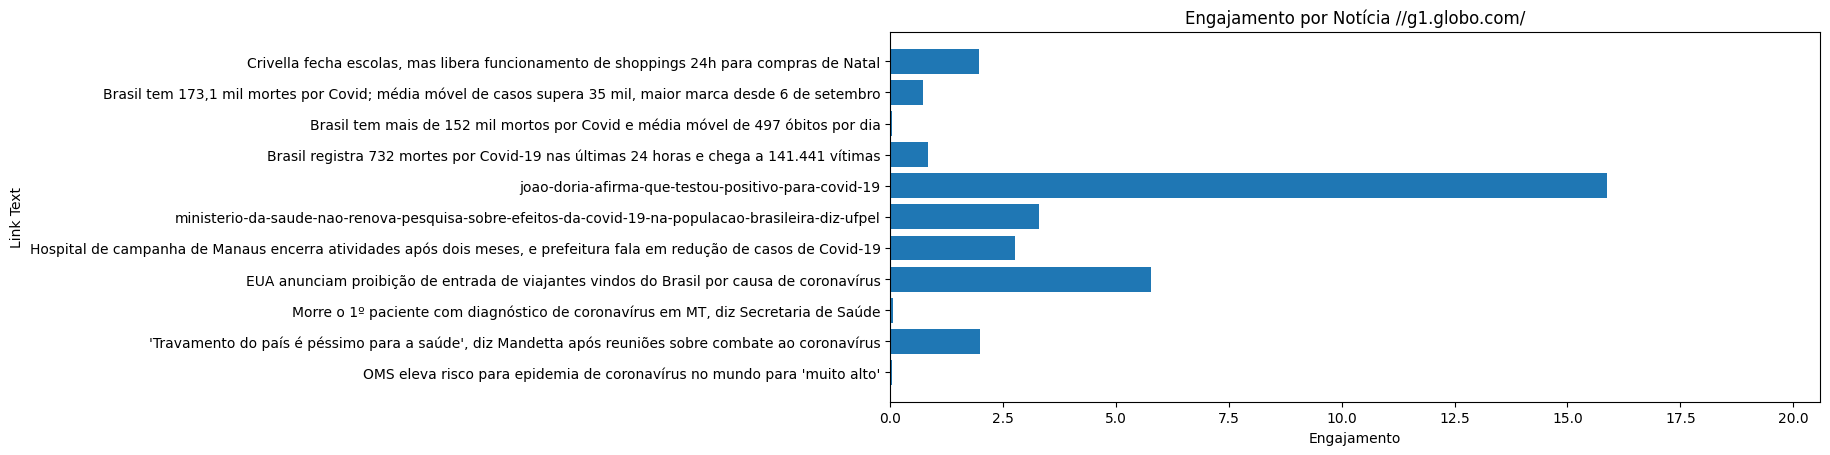

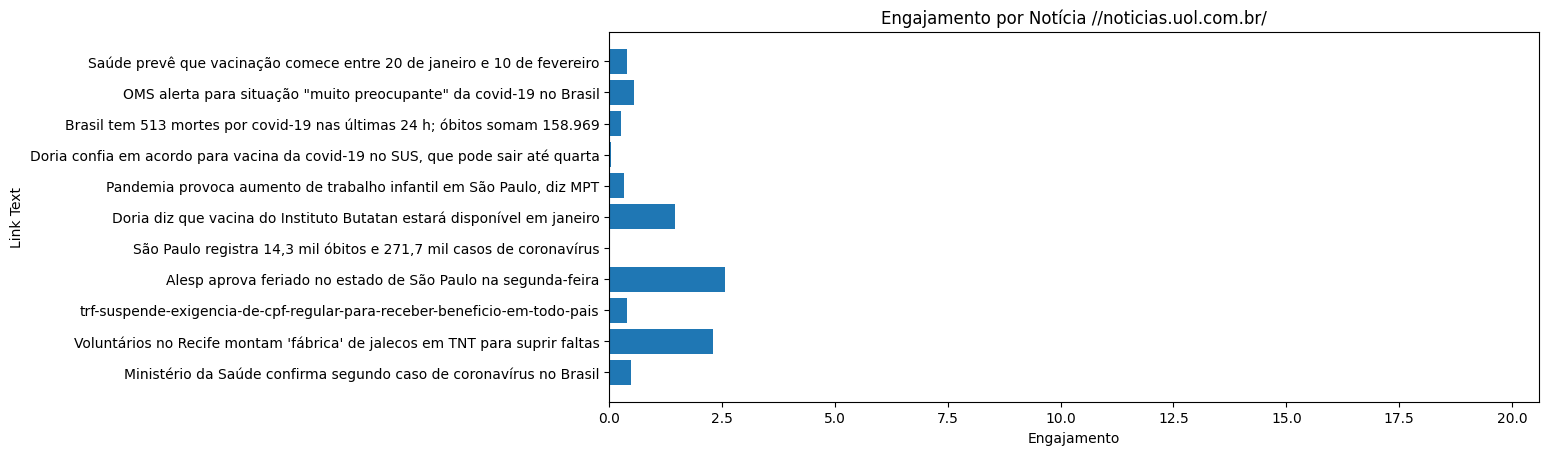

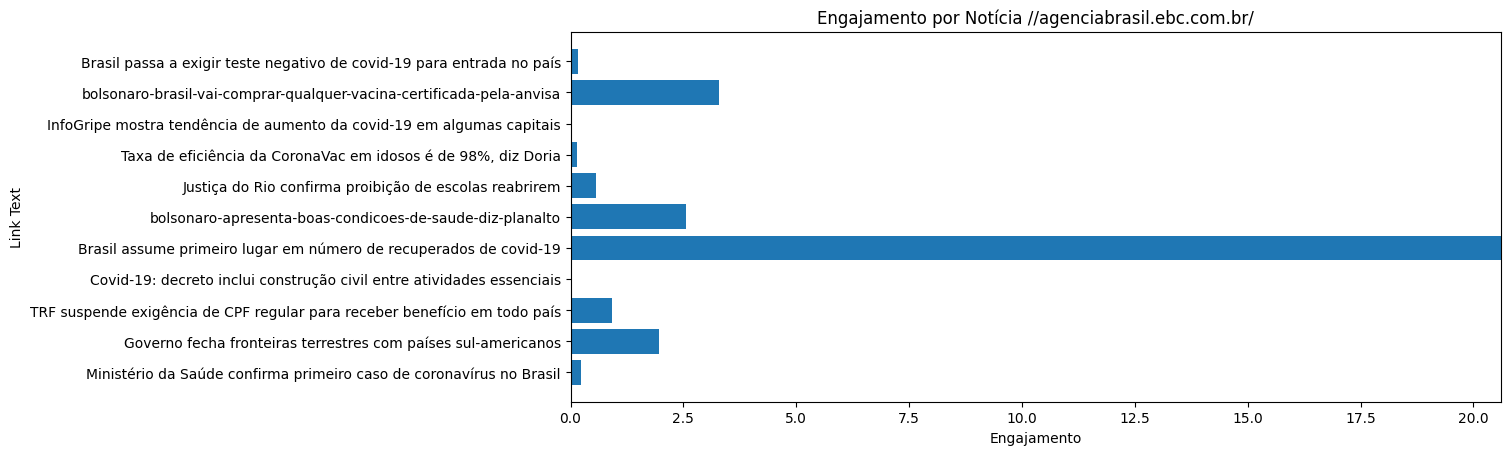

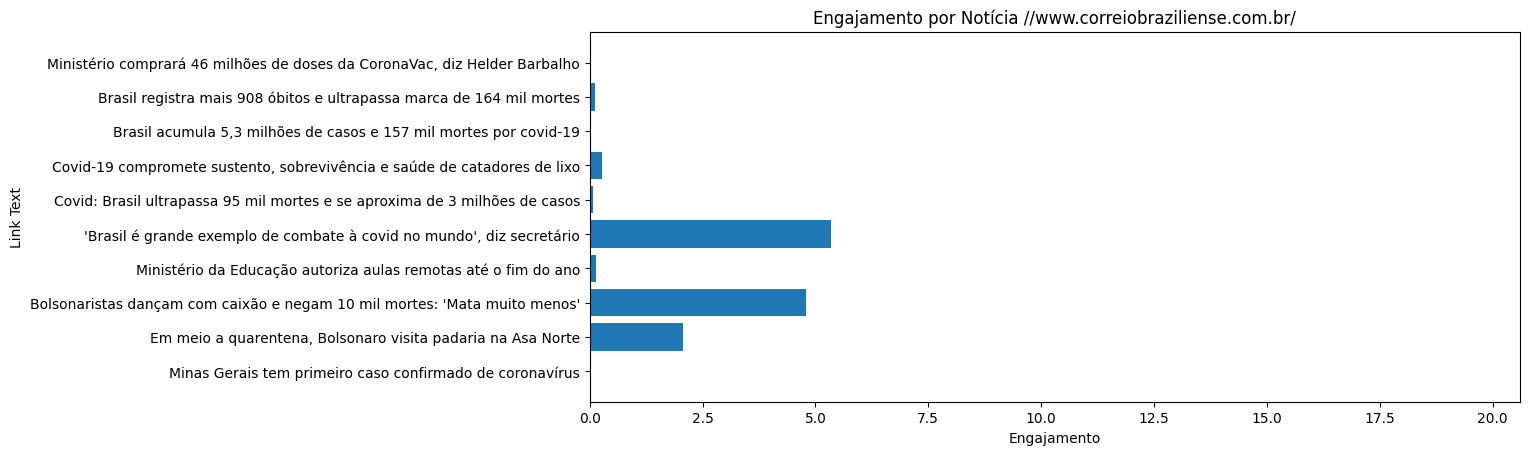

In [ ]:
max_width = 0
for domain in domains_final:
    df_filtered = dfs_domains_engagement[domain].dropna(subset=['Engagement Rate (Average)'])
    width = df_filtered['Engagement Rate (Average)'].max()
    if width > max_width:
        max_width = width

# Create the plots
for i, domain in enumerate(domains_final):
    plt.figure(i).set_figwidth(12)
    df_filtered = dfs_domains_engagement[domain].dropna(subset=['Engagement Rate (Average)'])
    plt.barh(df_filtered['Link Text'], df_filtered['Engagement Rate (Average)'])
    plt.xlim(0, max_width)
    plt.title(f'Engajamento por Notícia {domain}')
    plt.xlabel('Engajamento')
    plt.ylabel('Link Text')

plt.show()

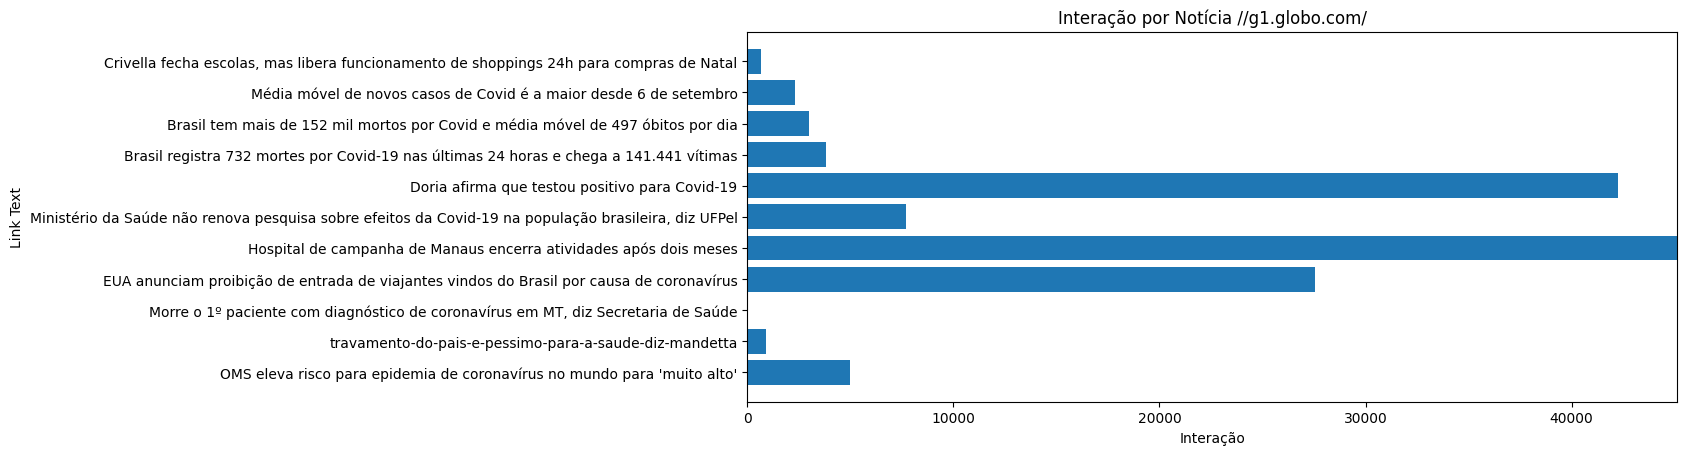

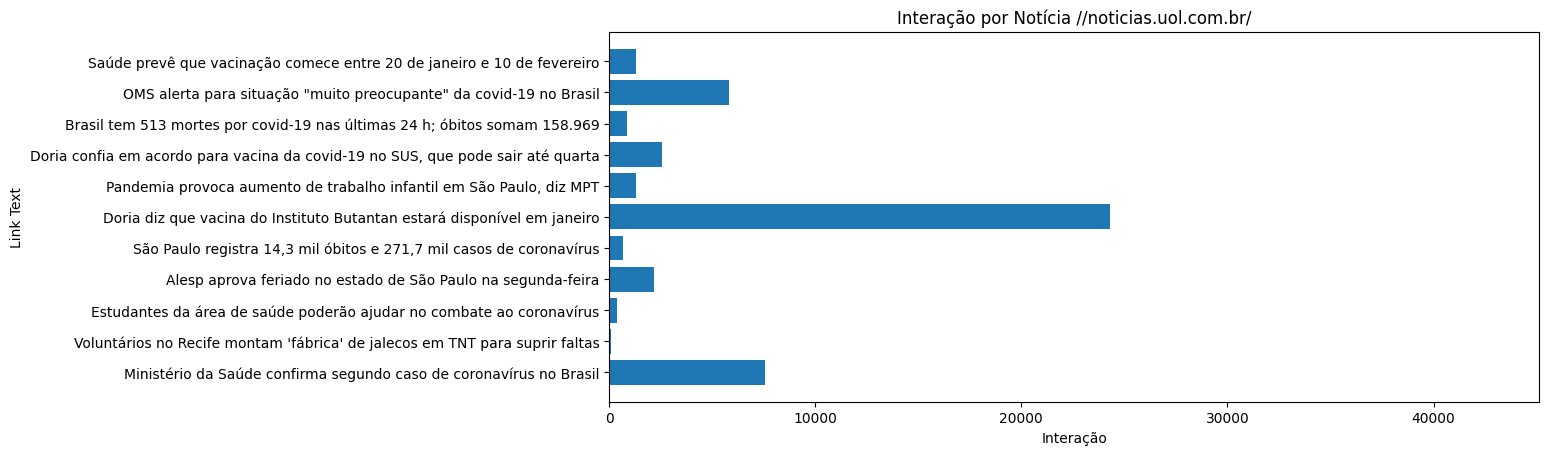

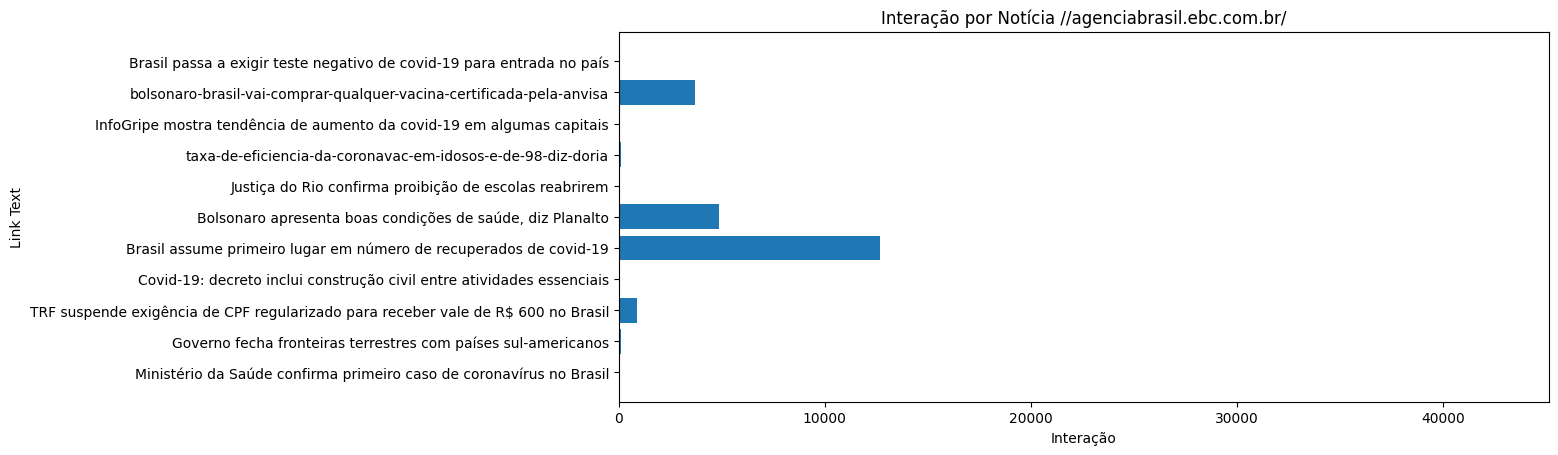

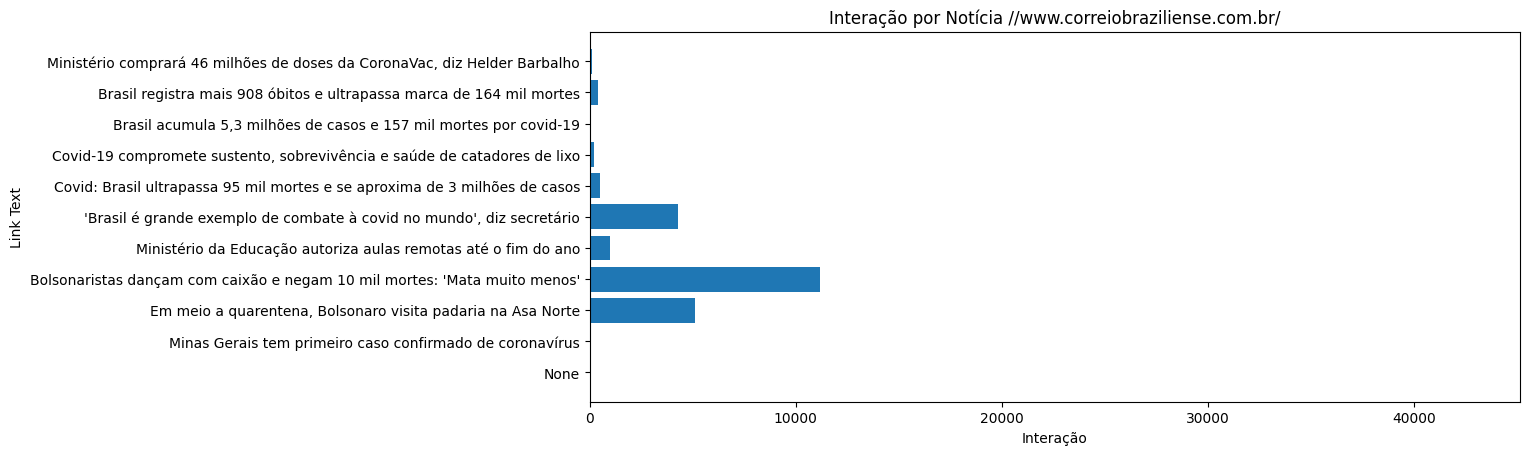

In [ ]:
max_width = 0
for domain in domains_final:
    df_filtered = dfs_domains[domain].dropna(subset=['Total Interactions'])
    width = df_filtered['Total Interactions'].max()
    if width > max_width:
        max_width = width

# Create the plots
for i, domain in enumerate(domains_final):
    plt.figure(i).set_figwidth(12)
    df_filtered = dfs_domains[domain].dropna(subset=['Total Interactions'])
    plt.barh(df_filtered['Link Text'], df_filtered['Total Interactions'])
    plt.xlim(0, max_width)
    plt.title(f'Interação por Notícia {domain}')
    plt.xlabel('Interação')
    plt.ylabel('Link Text')

plt.show()

In [ ]:
def hopAround(link, domains, level=1):
  l_res = requests.get(link)
  tree = {link: getLinks(l_res.text, domains)}
  return tree
#this will get the links on the hop
def getLinks(text, domains):
  pos = 0
  links = []
  while('http' in text):
    pos = text.index("http")
    link = text[pos:pos+text[pos:].index("\" ")]
    if (link != None):
      domain = getDomain(link)
      print(domain)
      print(domains)
      if(domain == None):
        continue
      elif link not in links and domain in domains:
          links.append(link)
    text = text[:pos] + text[pos+4:]
  return links

for m in links_per_month:
  for l in links_per_month[m]:
    print(hopAround(l, 1))


#hopAround('https://agenciabrasil.ebc.com.br/saude/noticia/2020-02/ministerio-da-saude-confirma-primeiro-caso-de-coronavirus-no-brasil', domains_final)

//ogp.me/
1


TypeError: ignored